In [1]:
import Networks
import numpy as np
import NetGraphics
import random as rand
import scipy,pylab
import matplotlib.pyplot as plt

In [2]:
def MakeRingGraph(L,Z):
    g = Networks.UndirectedGraph()
    for i in range(L):
        for j in range(int(np.ceil(-Z/2)),Z//2+1):
            g.AddEdge(i,(i+j)%L)
    return g

def addRandomEdges(g,num_edges_tried):
    allNodes = g.GetNodes()
    for i in range(num_edges_tried):
        node1 = rand.choice(allNodes)
        node2 = rand.choice(allNodes)
        g.AddEdge(node1,node2)
    return g

def MakeSmallWorldNetwork(L,Z,p):
    g = MakeRingGraph(L,Z)
    return addRandomEdges(g,int(L*Z*p/2))

def SmallWorldSimple(L,Z,p):
    g = MakeSmallWorldNetwork(L,Z,p)
    NetGraphics.DisplayCircleGraph(g)
    return

def MakePathLengthsHistogram(L=100,Z=4,p=0.1):
    g = MakeSmallWorldNetwork(L,Z,p)
    lengths = g.FindAllPathLengths().values()
    pylab.hist(lengths, bins=range(max(lengths))) 
    return

def FindAverageAveragePathLength(L, Z, p, numTries):
    data = [MakeSmallWorldNetwork(L,Z,p).FindAveragePathLength() for i in range(numTries)]
    return np.average(data),np.std(data)

def GetPathLength_vs_p(L,Z,num_tries,p_array):
    data = [FindAverageAveragePathLength(L,Z,p,num_tries) for p in p_array]
    return [[x[0] for x in data],[x[1] for x in data]]

def PlotPathLength_vs_p(L,Z,num_tries = 2, p_array=10.**np.arange(-3., 0.001, 0.25)):
    data = GetPathLength_vs_p(L,Z,num_tries,p_array)
    plt.errorbar(p_array,data[0],yerr=data[1])
    return

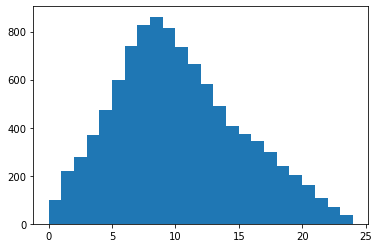

In [3]:
MakePathLengthsHistogram(100,2,0.1)

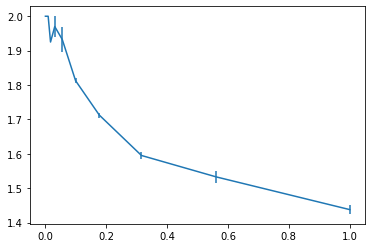

In [4]:
PlotPathLength_vs_p(20,6)